Entanglement Paths
=================

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from math import sin, cos, pi
from pyautospec import FunctionMps

Sine function
-------------------

Use DMRG learning to model the `sin` function using words with *fixed* length 8.

In [2]:
# learn the sin function in the [0,2π] interval
sin_mps = FunctionMps(sequence_length=8, max_bond_dim=8)

sin_mps.fit(sin, x0=0.0, x1=2*pi, epochs=100, learn_rate=0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: avg=0.68 std=1.05
epoch   20: avg=0.18 std=0.25
epoch   30: avg=0.05 std=0.07
epoch   40: avg=0.02 std=0.02
epoch   50: avg=0.00 std=0.01
epoch   60: avg=0.00 std=0.00
epoch   70: avg=0.00 std=0.00
epoch   80: avg=0.00 std=0.00
epoch   90: avg=0.00 std=0.00
epoch  100: avg=0.00 std=0.00


  FunctionMps(N=8) <built-in function sin>: [0.00,6.28] → R

  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  8│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:   8 (max: 8)
        

<IPython.core.display.Javascript object>


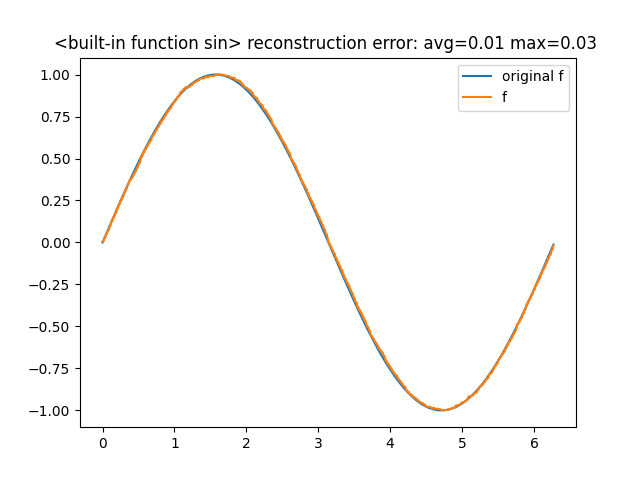

In [3]:
sin_mps.comparison_chart(n_points=500)

<IPython.core.display.Javascript object>


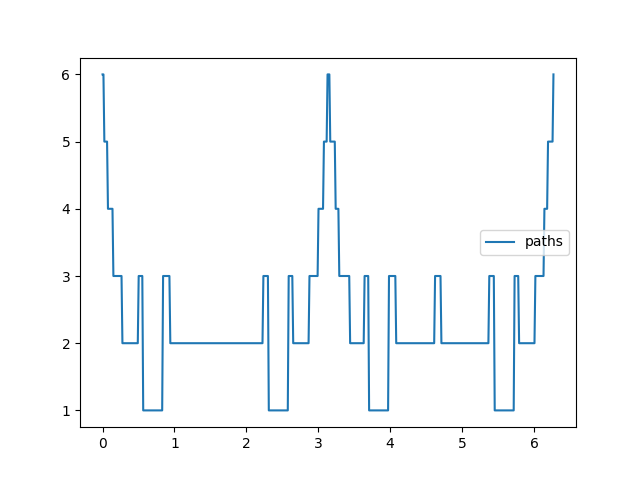

In [4]:
xs = np.linspace(sin_mps.x0, sin_mps.x1, endpoint = False, num = 500)
ps = [sin_mps.paths_weights(x, threshold=0.1)[0].shape[0] for x in xs]

plt.figure()
plt.plot(xs, ps, label="paths")
plt.legend()

Polynomials
------------------

In [5]:
# learn 5x^3 - 3x^2 + 2x + 2 in the [-10,+10] interval
p3_mps = FunctionMps(sequence_length=8, max_bond_dim=16)

p3_mps.fit(lambda x: 5*x**3 - 3*x**2 + 2*x + 2, x0=-4.0, x1=4.0, epochs=200, learn_rate=0.1)

  0%|          | 0/200 [00:00<?, ?it/s]

epoch   10: avg=4051.15 std=7627.55
epoch   20: avg=907.56 std=1748.00
epoch   30: avg=234.99 std=525.31
epoch   40: avg=56.64 std=126.99
epoch   50: avg=15.23 std=36.83
epoch   60: avg=4.38 std=10.86
epoch   70: avg=1.10 std=2.84
epoch   80: avg=0.36 std=0.96
epoch   90: avg=0.12 std=0.30
epoch  100: avg=0.05 std=0.12
epoch  110: avg=0.02 std=0.05
epoch  120: avg=0.01 std=0.02
epoch  130: avg=0.00 std=0.01
epoch  140: avg=0.00 std=0.00
epoch  150: avg=0.00 std=0.00
epoch  160: avg=0.00 std=0.00
epoch  170: avg=0.00 std=0.00
epoch  180: avg=0.00 std=0.00
epoch  190: avg=0.00 std=0.00
epoch  200: avg=0.00 std=0.00


  FunctionMps(N=8) <function <lambda> at 0x6cc0d83189d0>: [-4.00,4.00] → R

  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  8│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:  16 (max: 16)
        

<IPython.core.display.Javascript object>


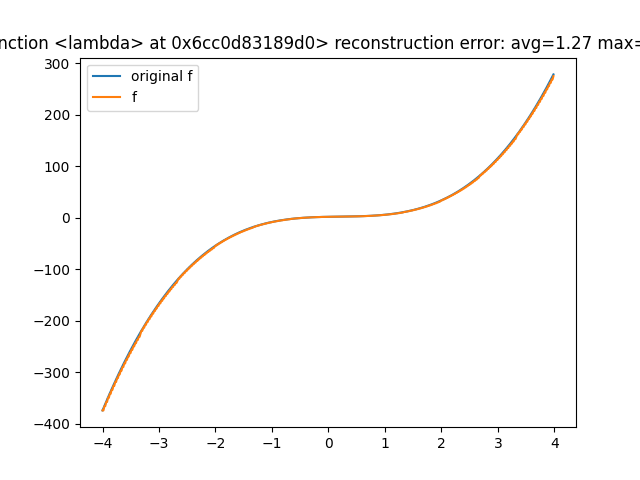

In [6]:
p3_mps.comparison_chart(n_points=500)

<IPython.core.display.Javascript object>


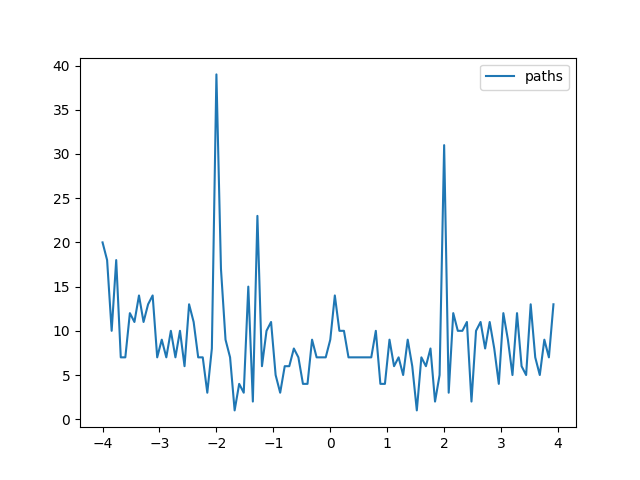

In [7]:
xs = np.linspace(p3_mps.x0, p3_mps.x1, endpoint = False, num = 100)
ps = [p3_mps.paths_weights(x, threshold=1)[0].shape[0] for x in xs]

plt.figure()
plt.plot(xs, ps, label="paths")
plt.legend()

Rapidly Varying
-----------------------

Let's try a more challenging example

In [8]:
f_mps = FunctionMps(sequence_length=8, max_bond_dim=8)

f_mps.fit(lambda x: cos(7*x)*sin(2*x*x - x), x0=0, x1=2*pi, epochs=100, learn_rate=0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: avg=0.12 std=0.16
epoch   20: avg=0.04 std=0.06
epoch   30: avg=0.01 std=0.03
epoch   40: avg=0.01 std=0.01
epoch   50: avg=0.00 std=0.01
epoch   60: avg=0.00 std=0.00
epoch   70: avg=0.00 std=0.00
epoch   80: avg=0.00 std=0.00
epoch   90: avg=0.00 std=0.00
epoch  100: avg=0.00 std=0.00


  FunctionMps(N=8) <function <lambda> at 0x6cc0d85681f0>: [0.00,6.28] → R

  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  8│
  └─┬─┘ └─┬─┘       └─┬─┘

  particle dim:   2
      bond dim:   8 (max: 8)
        

<IPython.core.display.Javascript object>


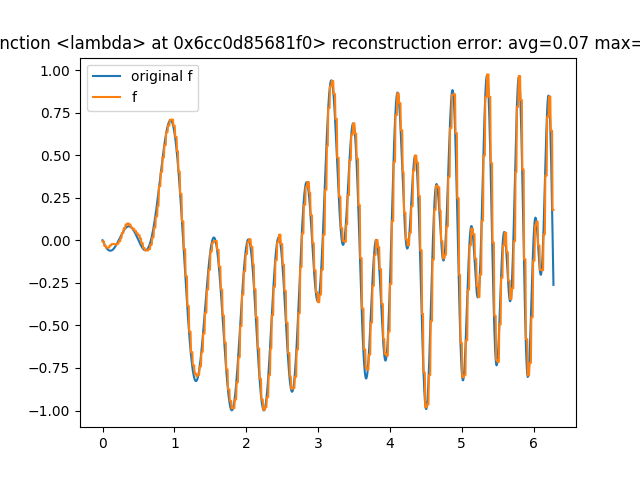

In [9]:
f_mps.comparison_chart(n_points=1000)

<IPython.core.display.Javascript object>


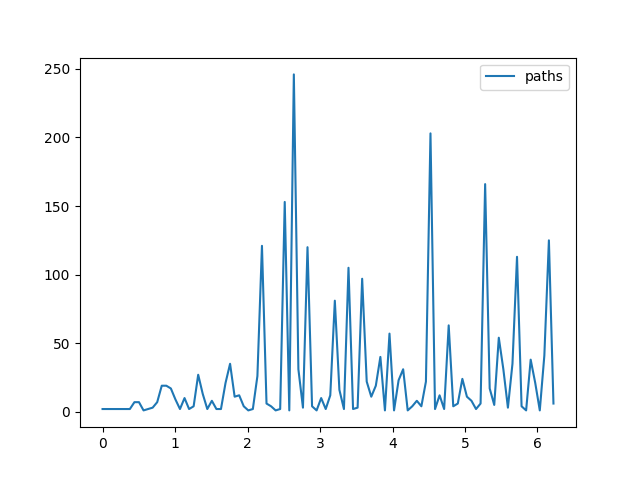

In [10]:
xs = np.linspace(f_mps.x0, f_mps.x1, endpoint = False, num = 100)
ps = [f_mps.paths_weights(x, threshold=0.1)[0].shape[0] for x in xs]

plt.figure()
plt.plot(xs, ps, label="paths")
plt.legend()